### 네이버 "이런점이 좋아요" 워드클라우드

In [3]:
import pandas as pd
import numpy as np
import re
import os

from wordcloud import WordCloud, STOPWORDS
from PIL import Image  # 그림 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
#rcParams['font.family'] = 'Malgun Gothic'
rcParams['font.family'] = 'Apple Gothic'


#NLTK Stopwords
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
['Malgun Gothic' in f]

[False]

In [21]:
naver_df = pd.read_csv('../../naver_crw/DAOU/test_large_out_v3.csv', index_col=0, encoding='euc-kr')

In [45]:
naver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6664 entries, 0 to 6663
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   사업장명                    6664 non-null   object 
 1   업소유형                    874 non-null    object 
 2   업태구분명                   6664 non-null   object 
 3   지번주소                    6653 non-null   object 
 4   도로명주소                   3986 non-null   object 
 5   가까운 지하철역                5774 non-null   object 
 6   지하철역과의 거리               6664 non-null   float64
 7   도보시간                    6664 non-null   float64
 8   위도                      5774 non-null   float64
 9   경도                      5774 non-null   float64
 10  별점                      310 non-null    float64
 11  방문자 리뷰수                 685 non-null    object 
 12  블로그 리뷰수                 513 non-null    object 
 13  한실수                     5434 non-null   float64
 14  양실수                     5347 non-null   

In [70]:
#naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'] = naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'].replace("{", "").replace("}", "")
#naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'].replace("}", "")
len(naver_df[pd.notna(naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'])])
text_array = naver_df[pd.notna(naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'])]['네이버 이런점이 좋아요 {항목:좋아요수}'].to_list()
text_array

["{'깨끗해요': 29},{'조용히 쉬기 좋아요': 22},{'냉난방이 잘돼요': 22},{'침구가 좋아요': 21},{'대중교통이 편해요': 13},{'화장실이 잘 되어있어요': 13},{'뷰가 좋아요': 11},{'인테리어가 멋져요': 7},{'친절해요': 6},{'근처에 갈 곳이 많아요': 6},{'즐길 거리가 많아요': 2},{'사진이 잘 나와요': 2},{'방음이 잘돼요': 2}",
 "{'근처에 갈 곳이 많아요': 7},{'침구가 좋아요': 6},{'친절해요': 6},{'깨끗해요': 5},{'화장실이 잘 되어있어요': 4},{'즐길 거리가 많아요': 3},{'대중교통이 편해요': 3},{'인테리어가 멋져요': 2},{'조용히 쉬기 좋아요': 1},{'주차하기 편해요': 1},{'방음이 잘돼요': 1}",
 "{'인테리어가 멋져요': 30},{'친절해요': 29},{'깨끗해요': 18},{'조용히 쉬기 좋아요': 18},{'근처에 갈 곳이 많아요': 13},{'뷰가 좋아요': 12},{'사진이 잘 나와요': 11},{'대중교통이 편해요': 10},{'냉난방이 잘돼요': 4},{'방음이 잘돼요': 3},{'화장실이 잘 되어있어요': 3},{'주차하기 편해요': 1}",
 "{'친절해요': 34},{'인테리어가 멋져요': 32},{'깨끗해요': 25},{'사진이 잘 나와요': 20},{'조용히 쉬기 좋아요': 13},{'침구가 좋아요': 11},{'호캉스하기 좋아요': 11},{'즐길 거리가 많아요': 9},{'뷰가 좋아요': 9},{'냉난방이 잘돼요': 6},{'주차하기 편해요': 5},{'조식이 맛있어요': 3},{'대중교통이 편해요': 3},{'수영장이 잘 되어있어요': 1},{'방음이 잘돼요': 1}",
 "{'인테리어가 멋져요': 417},{'조용히 쉬기 좋아요': 394},{'호캉스하기 좋아요': 344},{'깨끗해요': 338},{'침구가 좋아요': 299},{'친절해요': 250},{'사진이 잘 나와요': 136},{'주차하기 편해요': 

In [71]:
len(text_array)

191

In [86]:
text_list = []
#for i in [1]:
for i in range(len(text_array)):
    line_split = text_array[i].split(",")
    #print(line_split)
    #print(len(line_split))

    for li in line_split:
        #print(j)
        ele_text = li.replace("{","").replace("}","").split(":")[0]
        ele_count = int(li.replace("{","").replace("}","").split(":")[1])
        #print(li)
        #print(i, ele_text, ele_count)
        text_append = (ele_text+" ")*ele_count
        #print(text_append)
        text_list.append(text_append)
    
    
    #print(f'------------{i} 끝')

#print(text_list)
len(text_list)

# 저장
with open('../DAOU/text_out.txt', 'w', encoding='utf-8') as fp:
    for answer in text_list:
        fp.write(answer + '\n')


In [87]:
with open('../DAOU/text_out.txt', encoding='utf-8') as file:
    text = file.read()

In [88]:
#한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()

In [90]:
# 명사 추출
tokens = okt.nouns(text)

In [91]:
tokens[:30]

['냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방',
 '냉',
 '난방']

In [92]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

In [93]:
import nltk
nltk.download('punkt') #코랩에서는 매번 다운함 / 로컬에서는 한번만 실행

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

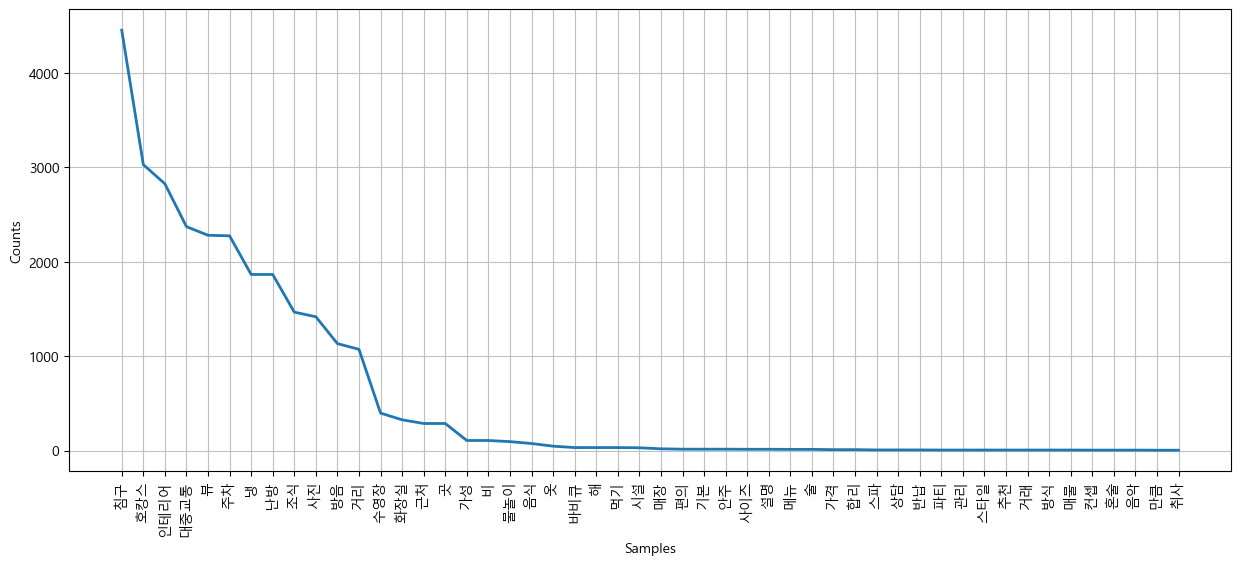

In [96]:
gift = nltk.Text(tokens, name = '결혼기념일선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()